## Business Problem
As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our client's advertising campaign.
We have conducted two ad-campaigns, one on Facebook and other on Google AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By analyzing and identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.


### Objective
Which Ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

### Data Description
This dataset contains campaign data for both Facebook Ads and AdWords, offering a side-by-side comparison of performance metrics, costs, and conversions. It's an ideal resource for A/B testing in marketing, especially for analyzing the effectiveness of ad campaigns across platforms.

1. date_of_campaign          - The date of each campaign, ranging from 2021 to 2024.
2. facebook_ad_campaign      - The name of the Facebook ad campaign.
3. facebook_ad_views         - The number of people who viewed the Facebook ad.
4. facebook_ad_clicks        - The number of people who clicked the Facebook ad after viewing it.
5. facebook_ad_conversions   - The number of people who became customers after clicking the Facebook ad.
6. facebook_cost_per_ad      - The cost of running a Facebook ad in (USD).
7. facebook_ctr              - Facebook Click-Through Rate in % (CTR): (facebook_ad_clicks / facebook_ad_views) × 100
8. facebook_conversion_rate  - Facebook conversion rate in % : (facebook_ad_conversions / facebook_ad_clicks) × 100
9. facebook_cost_per_click   - Cost per click for Facebook ads: (facebook_cost_per_ad / facebook_ad_clicks)
10. adword_ad_campaign       - The name of the AdWords campaign.
11. adword_ad_views          - The number of people who viewed the AdWords ad.
12. adword_ad_clicks         - The number of people who clicked the AdWords ad after viewing it.
13. adword_ad_conversions    - The number of people who became customers after clicking the AdWords ad.
14. adword_cost_per_ad       - The cost of running an AdWords ad in (USD).
15. adword_ctr               - AdWords Click-Through Rate in % (CTR): (adword_ad_clicks / adword_ad_views) × 100
16. adword_conversion_rate   - AdWords conversion rate in %: (adword_ad_conversions / adword_ad_clicks) × 100
17. adword_cost_per_click    - Cost per click for AdWords ads:(adword_cost_per_ad / adword_ad_clicks)

In [2]:
# loading the dataset
df = pd.read_csv('./data/A_B_testing_dataset.csv')

In [3]:
# data overview
df.head()

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57


In [4]:
# checking the shape
df.shape

(1000, 17)

In [5]:
# checking the data types
df.dtypes

date_of_campaign             object
facebook_ad_campaign         object
facebook_ad_views             int64
facebook_ad_clicks            int64
facebook_ad_conversions       int64
facebook_cost_per_ad          int64
facebook_ctr                float64
facebook_conversion_rate    float64
facebook_cost_per_click     float64
adword_ad_campaign           object
adword_ad_views               int64
adword_ad_clicks              int64
adword_ad_conversions         int64
adword_cost_per_ad            int64
adword_ctr                  float64
adword_conversion_rate      float64
adword_cost_per_click       float64
dtype: object

As we can see the data column is in string format. We need to convert it into a datetime column

In [6]:
# converting date to datetime
df['date_of_campaign'] = pd.to_datetime(df['date_of_campaign'])

In [7]:
# descriptive statistics
df.describe()

,date_of_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2023-07-04 07:13:26.399999744,2152.031000,44.196000,11.975000,156.610000,2.28316,32.696080,4.310500,4771.438000,60.128000,5.933000,124.741000,1.280950,10.807510,2.265540
min,2021-12-22 00:00:00,1050.000000,15.000000,5.000000,60.000000,0.49000,6.850000,0.960000,3715.000000,31.000000,3.000000,50.000000,0.540000,3.370000,0.580000
25%,2022-10-07 18:00:00,1600.250000,30.000000,8.000000,110.000000,1.36750,18.052500,2.337500,4258.250000,45.000000,4.000000,86.000000,0.940000,6.970000,1.470000
50%,2023-07-20 12:00:00,2123.500000,44.500000,12.000000,156.000000,2.07000,27.120000,3.600000,4808.500000,60.000000,6.000000,124.000000,1.260000,9.720000,2.030000
75%,2024-03-24 00:00:00,2706.250000,58.000000,16.000000,205.000000,2.92250,41.880000,5.610000,5300.750000,75.000000,8.000000,163.000000,1.570000,13.485000,2.802500
max,2024-12-20 00:00:00,3320.000000,73.000000,19.000000,250.000000,6.86000,118.750000,16.530000,5754.000000,89.000000,9.000000,200.000000,2.370000,29.030000,6.190000
std,NaN,661.982166,16.833328,4.298471,54.918904,1.20670,20.570796,2.751582,598.647684,17.047822,2.011606,43.809053,0.402492,5.205133,1.101846


As we can see in the date column the minimum is 22-12-2021 and the maximum is 20-12-2024. Which means that the data ranges from 2021 to 2024. We will perform our analysis only for the years 2023 and 2024 because it will make our analysis more relevant and consistent

In [8]:
df = df[df['date_of_campaign'].dt.year.isin([2023,2024])].reset_index(drop=True)

In [9]:
df.head()

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,2023-01-02,FACEBOOK AD,1283,17,15,153,1.33,88.24,9.00,ADWORD AD,4095,44,7,200,1.07,15.91,4.55
1,2023-01-03,FACEBOOK AD,1187,40,19,110,3.37,47.50,2.75,ADWORD AD,5313,35,5,130,0.66,14.29,3.71
2,2023-01-04,FACEBOOK AD,2040,16,9,148,0.78,56.25,9.25,ADWORD AD,5191,40,7,106,0.77,17.50,2.65
3,2023-01-05,FACEBOOK AD,3310,51,18,102,1.54,35.29,2.00,ADWORD AD,5094,34,7,57,0.67,20.59,1.68
4,2023-01-06,FACEBOOK AD,3178,57,5,90,1.79,8.77,1.58,ADWORD AD,4390,89,6,164,2.03,6.74,1.84


In [10]:
df.shape

(684, 17)

In [11]:
df.describe()

,date_of_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,684,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,2023-12-24 07:43:09.473684224,2139.260234,44.491228,12.169591,158.111111,2.306228,32.982909,4.330877,4785.714912,60.432749,5.885965,122.495614,1.282558,10.699094,2.222368
min,2023-01-02 00:00:00,1051.000000,15.000000,5.000000,60.000000,0.490000,6.850000,0.960000,3715.000000,31.000000,3.000000,50.000000,0.540000,3.370000,0.580000
25%,2023-07-06 00:00:00,1589.500000,30.000000,9.000000,110.750000,1.377500,18.570000,2.360000,4272.000000,45.000000,4.000000,83.000000,0.940000,6.900000,1.450000
50%,2023-12-31 12:00:00,2074.000000,45.000000,12.000000,158.000000,2.130000,27.100000,3.585000,4816.500000,60.500000,6.000000,122.000000,1.260000,9.620000,1.960000
75%,2024-06-15 06:00:00,2701.500000,59.000000,16.000000,210.250000,2.937500,41.940000,5.610000,5307.000000,76.000000,8.000000,159.250000,1.570000,13.330000,2.740000
max,2024-12-20 00:00:00,3315.000000,73.000000,19.000000,250.000000,6.550000,118.750000,16.530000,5750.000000,89.000000,9.000000,200.000000,2.370000,29.030000,6.190000
std,NaN,657.867492,16.852341,4.278779,55.421816,1.197434,20.613691,2.783546,593.250736,17.350740,1.983499,44.236503,0.405931,5.166387,1.121004


### Comparing Campaign performance

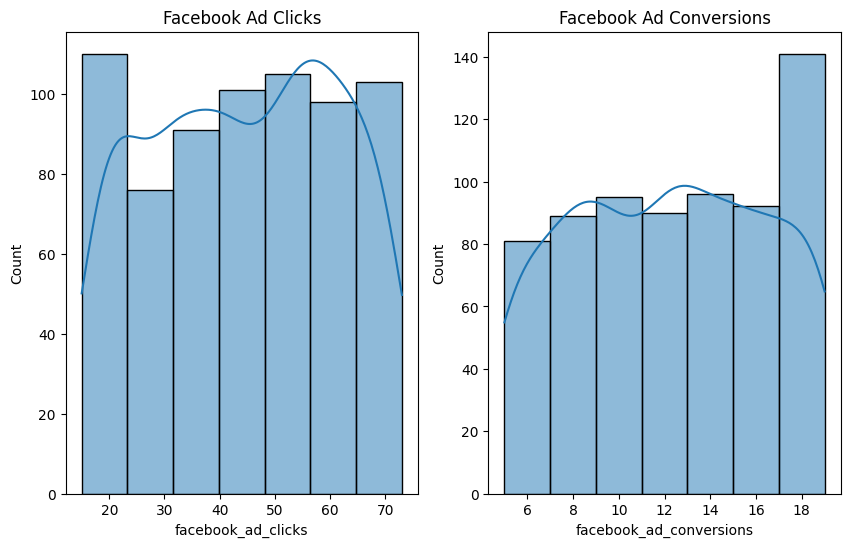

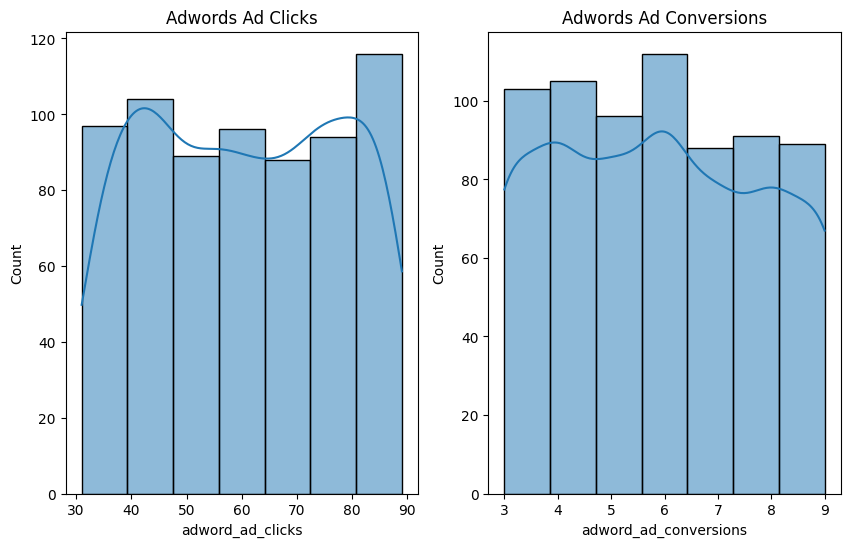

In [14]:
# distribution of clicks and conversions
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['facebook_ad_clicks'], bins=7, edgecolor='k', kde=True)
plt.title('Facebook Ad Clicks')

plt.subplot(1,2,2)
sns.histplot(df['facebook_ad_conversions'], bins=7, edgecolor='k', kde=True)
plt.title('Facebook Ad Conversions')
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['adword_ad_clicks'], bins=7, edgecolor='k', kde=True)
plt.title('Adwords Ad Clicks')

plt.subplot(1,2,2)
sns.histplot(df['adword_ad_conversions'], bins=7, edgecolor='k', kde=True)
plt.title('Adwords Ad Conversions')
plt.show()

#### Insights:
1. All four histograms show fairly balanced, moderately symmetrical distributions, with no extreme outliers on either end. This suggests that most campaigns fall within a typical range, without drastic under- or over-performance.
2. Facebook campaigns tend to be more efficient at driving conversions, with many campaigns converting strongly.
3. AdWords campaigns tend to generate higher click volumes, but don’t convert as well, suggesting a potential optimization gap in post-click engagement.
4. The absence of extreme outliers in all charts implies that the campaign data is well-controlled and clean, making it reliable for further analysis or modeling.

#### How frequently do we observe days with high number of conversions compared to days with low number of conversions

In [15]:
# creating a function to determine the category of conversions
def create_conversion_category(conversion_series):
    category = []
    for conversion in conversion_series:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

In [16]:
df['facebook_conversion_category'] = create_conversion_category(df['facebook_ad_conversions'])
df['adwords_conversion_category'] = create_conversion_category(df['adword_ad_conversions'])

In [17]:
df[['facebook_ad_conversions', 'facebook_conversion_category', 'adword_ad_conversions', 'adwords_conversion_category']].head()

,facebook_ad_conversions,facebook_conversion_category,adword_ad_conversions,adwords_conversion_category
0,15,10 - 15,7,6 - 10
1,19,more than 15,5,less than 6
2,9,6 - 10,7,6 - 10
3,18,more than 15,7,6 - 10
4,5,less than 6,6,6 - 10


In [18]:
df['facebook_conversion_category'].value_counts()

facebook_conversion_category
10 - 15         236
6 - 10          222
more than 15    183
less than 6      43
Name: count, dtype: int64

In [19]:
facebook = pd.DataFrame(df['facebook_conversion_category'].value_counts()).reset_index().rename(columns={'facebook_conversion_category': 'Category'})
facebook

,Category,count
0,10 - 15,236
1,6 - 10,222
2,more than 15,183
3,less than 6,43


In [20]:
df['adwords_conversion_category'].value_counts()

adwords_conversion_category
6 - 10         380
less than 6    304
Name: count, dtype: int64

In [21]:
adwords = pd.DataFrame(df['adwords_conversion_category'].value_counts()).reset_index().rename(columns={'adwords_conversion_category': 'Category'})
adwords

,Category,count
0,6 - 10,380
1,less than 6,304


In [22]:
# merging both the dataframes
category_df = pd.merge(facebook, adwords, on='Category', how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,236,0.0
1,6 - 10,222,380.0
2,less than 6,43,304.0
3,more than 15,183,0.0


In [23]:
category_df = category_df.iloc[[2,1,0,3]].reset_index(drop=True)
category_df

,Category,count_x,count_y
0,less than 6,43,304.0
1,6 - 10,222,380.0
2,10 - 15,236,0.0
3,more than 15,183,0.0


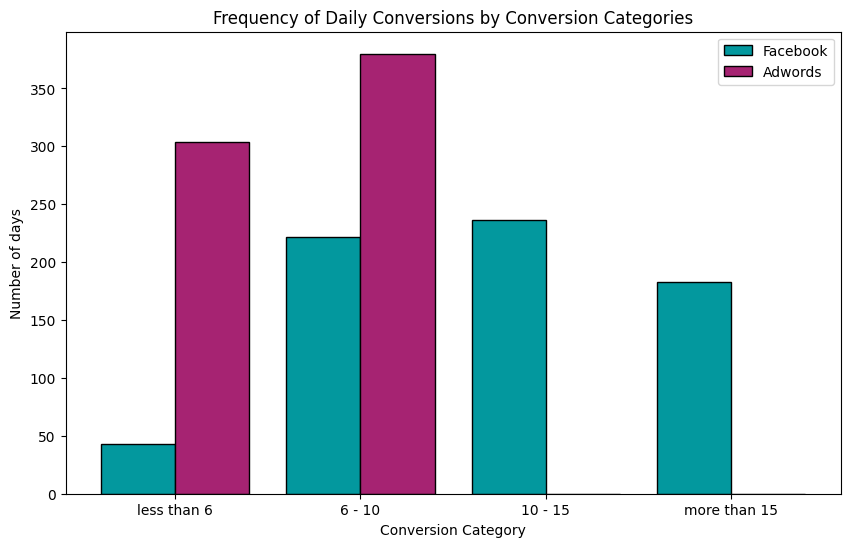

In [24]:
X_axis = np.arange(len(category_df))
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label='Facebook', color='#03989E', linewidth=1, edgecolor='k')
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label='Adwords', color='#A62372', linewidth=1, edgecolor='k')

plt.xticks(X_axis, category_df['Category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of days')
plt.title('Frequency of Daily Conversions by Conversion Categories', fontsize=12)
plt.legend(fontsize=10)
plt.show()

#### Ingishts
1. The distribution highlights a clear variance in performance between the two platforms, with Facebook consistently delivering stronger daily conversion volumes.
2. AdWords campaigns show no presence in the higher conversion ranges, suggesting a need to reassess targeting, ad content, bidding strategy, or external factors that may have limited campaign effectiveness
3. Facebook recorded a significantly higher number of high-conversion days compared to AdWords, especially in the "10–15" and "more than 15" conversion categories.

#### Do more clicks on the ad leads to more sales??

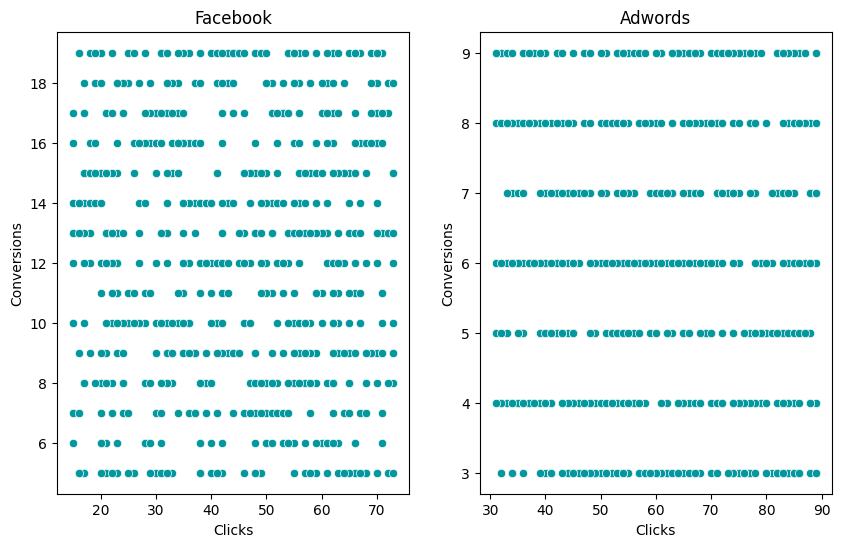

In [26]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df['facebook_ad_clicks'], y=df['facebook_ad_conversions'], color='#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.title('Facebook')

plt.subplot(1,2,2)
sns.scatterplot(x=df['adword_ad_clicks'], y=df['adword_ad_conversions'], color='#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.title('Adwords')

plt.show()

In [27]:
# find out the correlation coefficient
facebook_corr = df[['facebook_ad_conversions', 'facebook_ad_clicks']].corr()
facebook_corr

,facebook_ad_conversions,facebook_ad_clicks
facebook_ad_conversions,1.000000,-0.008832
facebook_ad_clicks,-0.008832,1.000000


In [28]:
adwords_corr = df[['adword_ad_conversions', 'adword_ad_clicks']].corr()
adwords_corr

,adword_ad_conversions,adword_ad_clicks
adword_ad_conversions,1.000000,0.002882
adword_ad_clicks,0.002882,1.000000


In [30]:
print('Correlation Coeff of Facebook: ', round(facebook_corr.values[0,1],2))
print('Correlation Coeff of Adwords: ', round(adwords_corr.values[0,1],2))

Correlation Coeff of Facebook:  -0.01
Correlation Coeff of Adwords:  0.0


#### Insights
1. Neither Facebook nor AdWords show a strong correlation between clicks and conversions.
2. Scatter plots confirm the lack of linear trend, as the data points are spread out and unpatterned. This indicates that higher click counts do not guarantee higher conversions, and vice versa.
3. Campaign success seems to rely on factors beyond just attracting clicks, such as ad relevance, landing page experience, or audience targeting.
4. Further investigation (e.g., segmenting by ad quality, device, demographics) may help uncover non-linear relationships or hidden patterns.

### Hypothesis Testing
Hypothesis: Conversion Performance between Facebook and AdWords campaigns — e.g., to see if one platform leads to significantly higher conversions than the other.

Null Hypothesis (H₀):
The mean conversions of Facebook ≤ mean conversions of AdWords.
→ Facebook is not better than AdWords.

Alternative Hypothesis (H₁):
The mean conversions of Facebook > mean conversions of AdWords.
→ Facebook results in more conversions.

In [32]:
print('Mean Conversion of Facebook', round(df['facebook_ad_conversions'].mean(),2))
print('Mean Conversion of Adwords', round(df['adword_ad_conversions'].mean(),2))

Mean Conversion of Facebook 12.17
Mean Conversion of Adwords 5.89


In [33]:
t_stats, p_value = st.ttest_ind(a=df['facebook_ad_conversions'], b=df['adword_ad_conversions'], equal_var=False)
print('\nT statistic', t_stats, '\np_value',p_value)


T statistic 34.84571212764807 
p_value 8.302310182501782e-173


In [34]:
#comparing the p_value with the significance value of 5% or 0.05
if p_value < 0.05:
    print(f'{p_value} is less than the significance value, Reject the Null Hypothesis')
else:
    print(f'{p_value} is greater than the significance value, Accept the Null Hypothesis')

8.302310182501782e-173 is less than the significance value, Reject the Null Hypothesis


#### Insights:
1. Mean conversions:

    Facebook campaigns have an average of 12.17 conversions.

    Adwords campaigns have an average of 5.89 conversions.

3. T-test results:
    The calculated t-statistic is 34.85, indicating a large difference between the two campaign groups.
    The p-value is extremely small (~8.3e-173), which is far below the common significance threshold of 0.05.

4. Interpretation:
    Because the p-value is much smaller than 0.05, we reject the null hypothesis that the mean conversions are the same for Facebook and Adwords campaigns.

5. Conclusion:
    There is strong statistical evidence to conclude that Facebook campaigns have a significantly higher mean conversion rate than Adwords campaigns during the analyzed period.



### Regression Analysis
1. Regression analysis is a statistical technique used to model and analyze the relationship between a dependent variable (outcome) and one or more independent variables (predictors).
2. In this case, we want to predict Facebook ad conversions (dependent variable) based on the number of Facebook ad clicks (independent variable).

#### How many Facebook Ad Conversions we can expect given a certain number of Facebook Ad Clicks

In [36]:
# independent variable
X = df['facebook_ad_clicks'].values.reshape(-1,1)

# dependent variable
y = df['facebook_ad_conversions']

# initializing the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y,prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2-Score):', round(r2,2), '%')
print('Mean Squared Error: ', round(mse,2))

Accuracy (R2-Score): 0.01 %
Mean Squared Error:  18.28


#### Insights:
The regression model fails to reliably predict Facebook conversions from ad clicks. This suggests that clicks alone are not a good predictor, and other variables (like CTR, cost per click, targeting quality, or campaign type) likely play a significant role.

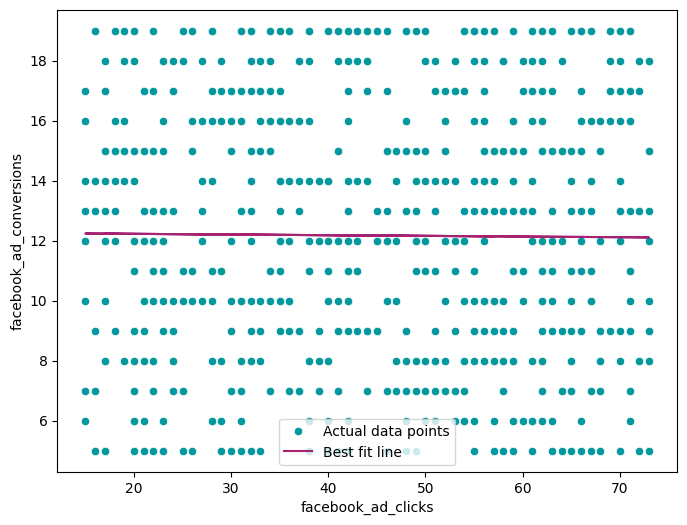

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['facebook_ad_clicks'], y=df['facebook_ad_conversions'], color='#03989E', label='Actual data points')
plt.plot(df['facebook_ad_clicks'], prediction, color='#A62372', label='Best fit line')
plt.legend()
plt.show()

#### Insights
1. The regression line doesn’t capture the trend in the data — it’s a poor fit, visually confirming what the R² score (0.01%) already told us.
2. The scatter points show no clear linear relationship, and the line essentially represents a flat average with minimal slope.

### Multiple Linear Regression
Multiple Linear Regression is a statistical technique used to predict the value of a dependent variable (e.g., conversions) based on two or more independent variables (e.g., clicks, CTR, cost per click).

In [37]:
# independent variables / features
features = ['facebook_ad_clicks', 'facebook_ctr', 'facebook_cost_per_click']
X = df[features]
y= df['facebook_ad_conversions']

mlr_model = LinearRegression()
mlr_model.fit(X,y)
mlr_pred = mlr_model.predict(X)

# model evaluation
r2 = r2_score(y, mlr_pred)*100
mse = mean_squared_error(y, mlr_pred)
print("R2 Score:", round(r2, 2), "%")
print("Mean Squared Error:", round(mse, 2))

R2 Score: 0.06 %
Mean Squared Error: 18.27


#### Insights
The multiple linear regression model fails to explain or predict Facebook ad conversions effectively, even after including key metrics like clicks, CTR, and cost per click. The near-zero R² indicates that the relationship between these variables and conversions is either:

1. non-linear, or
2. influenced by other unmeasured factors (e.g., ad creative quality, audience segment, campaign objective, time of day, etc.).

### Analyzing Facebook Campaign Metrics over time

In [62]:
facebook_df = df[['date_of_campaign', 'facebook_ad_campaign', 'facebook_ad_views', 'facebook_ad_clicks', 
                    'facebook_ad_conversions', 'facebook_cost_per_ad', 'facebook_ctr', 'facebook_conversion_rate', 
                    'facebook_cost_per_click']]

facebook_df['month'] = facebook_df['date_of_campaign'].dt.month
facebook_df

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,month
0,2023-01-02,FACEBOOK AD,1283,17,15,153,1.33,88.24,9.00,1
1,2023-01-03,FACEBOOK AD,1187,40,19,110,3.37,47.50,2.75,1
2,2023-01-04,FACEBOOK AD,2040,16,9,148,0.78,56.25,9.25,1
3,2023-01-05,FACEBOOK AD,3310,51,18,102,1.54,35.29,2.00,1
4,2023-01-06,FACEBOOK AD,3178,57,5,90,1.79,8.77,1.58,1
...,...,...,...,...,...,...,...,...,...,...
679,2024-12-17,FACEBOOK AD,1154,56,8,161,4.85,14.29,2.88,12
680,2024-12-18,FACEBOOK AD,1108,58,13,198,5.23,22.41,3.41,12
681,2024-12-18,FACEBOOK AD,1866,70,19,97,3.75,27.14,1.39,12
682,2024-12-20,FACEBOOK AD,1279,59,19,171,4.61,32.20,2.90,12


#### Months with more conversions

In [63]:
# Calculating monthly conversions
monthly_conversion = facebook_df.groupby('month')['facebook_ad_conversions'].sum()
monthly_conversion

month
1     829
2     689
3     729
4     688
5     716
6     496
7     957
8     587
9     604
10    767
11    711
12    551
Name: facebook_ad_conversions, dtype: int64

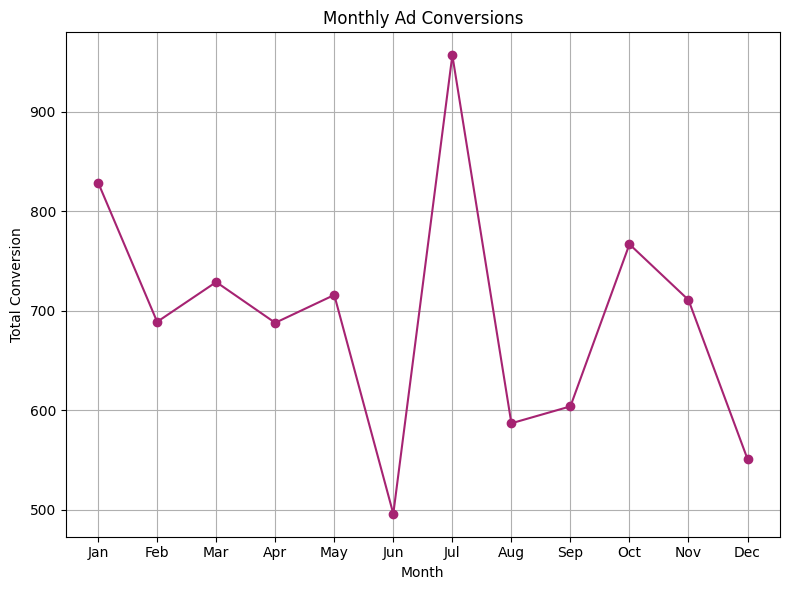

In [73]:
# Plotting the Monthly conversions from 2023 
plt.figure(figsize=(8,6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month_names, monthly_conversion, marker='o', color='#A62372')
plt.title('Monthly Ad Conversions')
plt.xlabel('Month')
plt.ylabel('Total Conversion')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Insights
1. July consistently recorded the highest Facebook ad conversions across both years, making it a peak-performing month likely due to successful seasonal campaigns or marketing pushes.
2. June and December showed the lowest conversions, indicating potential areas for strategy improvement, such as re-evaluating budget allocation, creative effectiveness, or audience targeting.
3. Early-year (Jan–Mar) and fall (Oct) months generally performed well, suggesting these periods could be optimal for focused ad investments and campaign launches.

#### Year wise comparison 2023 vs 2024

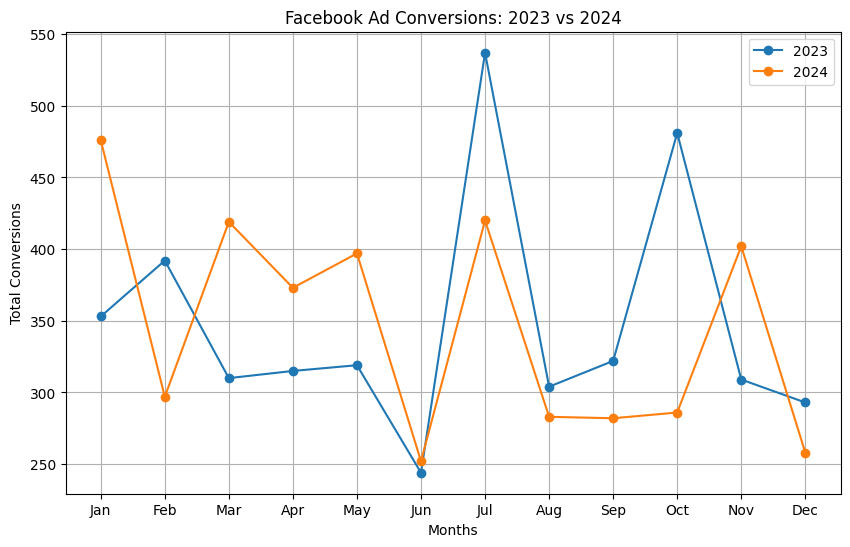

In [70]:
# filter the data by year
df_2023 = facebook_df[facebook_df['date_of_campaign'].dt.year==2023]
df_2024 = facebook_df[facebook_df['date_of_campaign'].dt.year==2024]

# Aggregate monthly data
monthly_2023 = df_2023.groupby(df_2023['date_of_campaign'].dt.month)['facebook_ad_conversions'].sum()
monthly_2024 = df_2024.groupby(df_2024['date_of_campaign'].dt.month)['facebook_ad_conversions'].sum()

plt.figure(figsize=(10,6))
plt.plot(month_names, monthly_2023, marker='o', label='2023')
plt.plot(month_names, monthly_2024, marker='o', label='2024')

plt.xlabel('Months')
plt.ylabel('Total Conversions')
plt.title('Facebook Ad Conversions: 2023 vs 2024')
plt.legend()
plt.grid(True)
plt.show()

##### Insights:
1. Seasonality Effects:
    Both 2023 and 2024 show a dip in conversions around June, followed by a sharp rise in July, suggesting a seasonal or campaign-related pattern impacting user behavior or ad effectiveness.
2. Higher Early-Year Conversions in 2024:
    The first half of 2024 (Jan-May) shows stronger conversions compared to the same period in 2023, indicating possible improvements in targeting, creative, or budget allocation.
3. Inconsistent Performance Towards Year-End:
    While 2023 had a significant spike in October, 2024 shows a spike in November instead, indicating some shifts in campaign timing or external factors influencing user engagement.

##### Suggestions:
1. Investigate June Dips:
    Dig into what caused the conversion drop in June both years. Could it be budget cuts, reduced ad frequency, or external events like holidays? Adjusting strategy here could smooth performance.
2. Leverage High Conversion Months:
    Since July and the last quarter are strong months, consider increasing budgets or launching special promotions during these periods to maximize conversions.
3. Compare Campaign Changes:
    Analyze what changed between 2023 and 2024 (creative, targeting, bidding) especially in early months to replicate successes or avoid past mistakes.
4. Test New Strategies in Low Conversion Months:
    For months like June and August with dips, experiment with new creatives, audience segments, or channels to boost engagement.

#### How does Cost Per Conversion (CPC) trend over time

In [75]:
# calculating monthly cost per conversion
monthly_cpc = facebook_df.groupby('month')[['facebook_ad_conversions', 'facebook_cost_per_ad']].sum()
monthly_cpc['Cost per Conversion'] = monthly_cpc['facebook_cost_per_ad'] / monthly_cpc['facebook_ad_conversions']
monthly_cpc

,facebook_ad_conversions,facebook_cost_per_ad,Cost per Conversion
month,,,
1,829,10255,12.370326
2,689,8811,12.788099
3,729,9448,12.960219
4,688,9057,13.164244
5,716,9190,12.835196
6,496,6151,12.401210
7,957,12631,13.198537
8,587,8067,13.742760
9,604,8066,13.354305


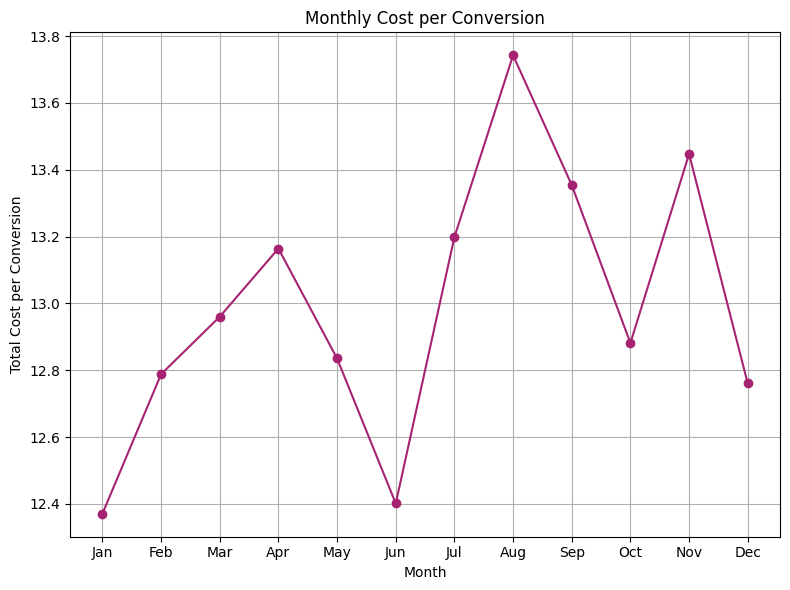

In [77]:
# plotting monthly cpc
plt.figure(figsize=(8,6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month_names, monthly_cpc['Cost per Conversion'], marker='o', color='#A62372')
plt.title('Monthly Cost per Conversion')
plt.xlabel('Month')
plt.ylabel('Total Cost per Conversion')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Insights
1. Cost per conversion fluctuates between ~12.4 and 13.8 throughout the year.
2. January and June are the most cost-effective months.
3. August and November see the highest costs, likely due to competition or seasonal factors.
4. Suggestion: Increase budget in low-cost months (Jan, Jun) and investigate spikes in Aug and Nov to optimize spend.

##### Is there a long term equlibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time

In [81]:
score, p_value, _ = coint(df['facebook_cost_per_ad'], df['facebook_ad_conversions'])
print('Cointegration test score: ',score)
print('P-value: ', p_value)

if p_value < 0.05:
    print('P-value is less than significance value, Reject the Null Hypothesis')
else:
    print('P-value is greater than significance value, Accept the Null Hypothesis')

Cointegration test score:  -27.33203785070144
P-value:  0.0
P-value is less than significance value, Reject the Null Hypothesis


#### Insights
1. Since the p-value is less than the significance value, we Reject the Null Hypothesis.
2. This means there is a long-term equlibrium relationship between cost per ad and conversions
3. Even though they might move independently in the short term, over time they tend to move together.